# Introduction

## Convolution and correlation

In real tasks, the question is often raised about the degree of similarity of one process to another, or about the independence of one process from another. In other words, it is required to determine the relationship between the signals, that is, to find a correlation.

**Correlation methods** are used in a wide range of tasks: signal search, computer vision and image processing, in radar problems to determine the characteristics of targets and determine the distance to an object. In addition, correlation is used to search for weak signals in noise.

In the signal filtering section, the concept of the impulse response of a filter was introduced. Recall that the impulse response $ℎ (𝑛)$ called the reaction of the circuit to the input action in the form of the Dirac function (δ-function). It reflects the effect of the circuit on the signal.

In the problems of passing signals through various digital nodes, the signal is convolved with the impulse response of the filter.

The correlation between the two signals can be calculated as the sum of the products of pairs of samples of the studied signals.

If we take two completely independent random sequences, then their sum of products tends to zero. Such signals are said to have zero correlation. Moreover, the longer the sequence, the stronger the result tends to zero.

The correlation is positive and negative. 

- Positive correlation - large values of one signal are associated with large values of another signal (an increase in one variable is interconnected with an increase in another variable). 
- A negative correlation is most easily understood as follows: an increase in one variable is associated with a decrease in another variable.

**Cross-correlation formula:**

$ r_{12} = \frac{1}{N} \sum_{n=0}^{N-1}x_1(n)x_2(n)$

Normalization factor $\frac{1}{N}$ used to exclude the influence of the duration of sequences.

In terms of the functional space of the signals, the correlation can be expressed as the cosine of the angle between the vectors. Consequently, with the complete coincidence of the signals, the degree of their connection will take a positive unit value, with the complete opposite of the signals, a negative unit, and with a complete mismatch, a zero value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft, ifft

%matplotlib inline

We give examples of signals and find a correlation between them

Positive correlation:

In [4]:
# signal x1(n)
x1 = np.array([1, 2, 3, 4, 5])

# correlation
np.correlate(x1, x1, mode='valid')

array([55])

In [5]:
# signal x1(n)
x1 = np.array([1, 2, 3, 4, 5])

# correlation via sum
np.sum(x1*x1)

55

As you can see, the correlate () function for matching signals calculates the sum of the products, which is fully consistent with the formula.

Negative correlation:

In [6]:
# signal x2(n)
x2 = -1 * np.array([1, 2, 3, 4, 5])

# correlation
np.correlate(x1, x2, mode='valid')

array([-55])

Different signals:

In [7]:
# signal x1(n), x2(n)
x1 = np.ones(5)      # [1, 1, 1, 1, 1]
x2 = np.arange(5)    # [0, 1, 2, 3, 4]

# correlation
np.correlate(x1, x2, mode='valid')

array([10.])

In [6]:
np.sum(x1*x2)   # correlation as sum of products

10.0

In practice, when two signals correlate, their relative position in time is unknown. The signals may have the same shape, but are delayed relative to each other. In this regard, to establish the maximum correlation, it is required to find it for **several delays**.

### Random signals

We find the correlation of two pseudo-random processes.

The `seed()` parameter sets the initial condition for the random process. If you set any number, then when you call any function of a random number, a predefined set of numbers (pseudo-random) will be generated.

Using the `randint()` method from the `numpy.random` library, we define a random sequence of integers.

Random processes with zero correlation:

No correlation, r12 = [0].


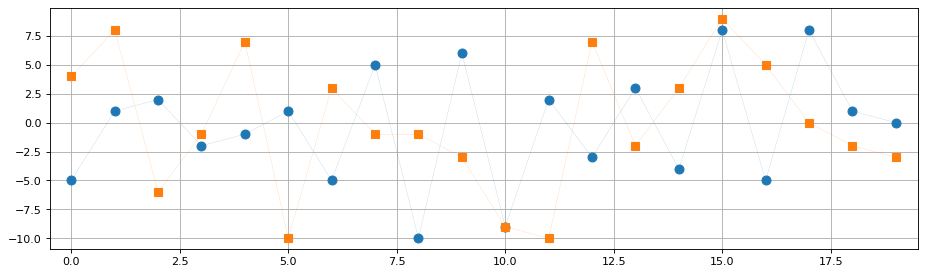

In [7]:
N = 20
# No correlation. Seed for all random process
np.random.seed(1)
x1 = np.random.randint(-10, 10, N)
x2 = np.random.randint(-10, 10, N)

# correlation
r12 = np.correlate(x1, x2, mode='valid')

# plot results
plt.figure(figsize=(14, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.1, markersize=8)
plt.plot(x2, '-s', linewidth=0.1, markersize=8)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print('No correlation, r12 = {}.'.format(r12))

Random processes with non-zero correlation:

Correlation, r12 = [-164].


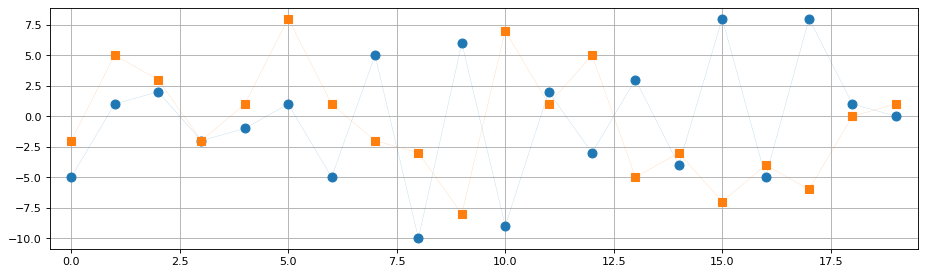

In [8]:
N = 20
# Correlation
np.random.seed(1)
x1 = np.random.randint(-10, 10, N)
np.random.seed(2)
x2 = np.random.randint(-10, 10, N)

# correlation
r12 = np.correlate(x1, x2, mode='valid')

# plot results
plt.figure(figsize=(14, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.1, markersize=8)
plt.plot(x2, '-s', linewidth=0.1, markersize=8)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print('Correlation, r12 = {}.'.format(r12))

The filtering property of the delta function in the process of calculating the correlation allows you to find the signal value at the moment when the delta function is not equal to 0:

Correlation, r12 = [-1.79343559].


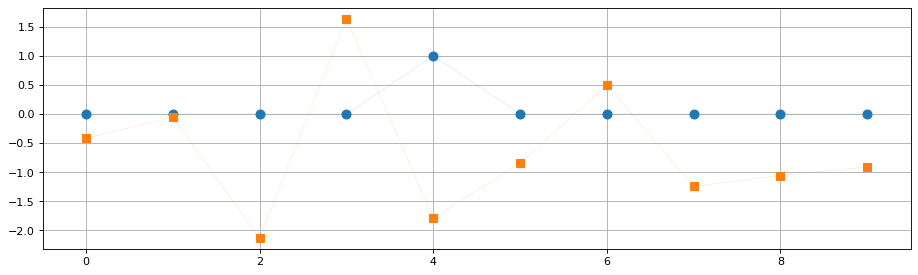

In [9]:
N = 10

# delta-function
x1 = np.zeros(N)
x1[4] = 1

# random signal
np.random.seed(2)
x2 = np.random.randn(N)

# correlation
r12 = np.correlate(x1, x2, mode='valid')

# plot results
plt.figure(figsize=(14, 4), dpi=80)
plt.plot(x1, '-o', linewidth=0.1, markersize=8)
plt.plot(x2, '-s', linewidth=0.1, markersize=8)
plt.xlim([-0.5, N-0.5])
plt.grid(True)

print('Correlation, r12 = {}.'.format(r12))

### Autocorrelation function

Autocorrelation function (ACF) - shows the relationship between the signal and its time-shifted copy.

ACF is used in coding information. The choice of the coding sequence according to the parameters of length, frequency and shape is largely due to the correlation properties of this sequence. The best code sequence has the lowest probability of false detection or operation (for detecting signals, for threshold devices) or false synchronization (for transmitting and receiving code sequences).

The autocorrelation function helps to find repeating sections in the time sequence, using the ACF you can find the carrier frequency of the signal.

Since ACF is the product of a signal and its copy, the physical meaning of ACF is the signal energy. In particular, at zero time (n = 0), the ACF is equal to the signal energy.

There is no built-in autocorrelation function in numpy, but it is not difficult to write it based on the `correlate()` function.

### ACF Properties

- ACF is a symmetrical and even function.
- It has a maximum at zero.
- ACF of a periodic sequence is a periodic function.
- The ACF of the sum of two uncorrelated signals is the sum of the ACF of these signals.
- The ACF of timeless white noise has a peak at zero and zeros in all others.

### ACF square wave

Example: The autocorrelation function of a rectangular pulse is a triangular signal. It will be shown below that the correlation and convolution of the signal with itself gives the same result.

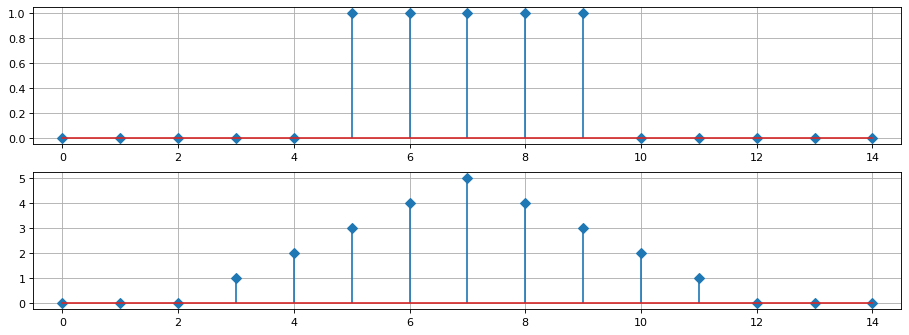

In [9]:
# Auto-correlation function
def auto_corr(x):
    res = np.correlate(x, x, mode='same') #same mode is same as convolution with maximum of 2 array lengths
    return res  # / np.max(res)

# Signal
x = np.concatenate([np.zeros(5), np.ones(5), np.zeros(5)])

# ACF
cfx = auto_corr(x)
xl = [x, cfx]

# Pot results
plt.figure(figsize=(14, 5), dpi=80)
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.stem(xl[i], linefmt='C0', markerfmt='D', use_line_collection=True)
    plt.grid(True)
    plt.xlim([-0.5, x.size-0.5])

Since the calculation of the ACF by the direct method is a labor-intensive operation (a large number of multiplication and addition operations) performed in $O(N^2)$, many problems raise the question of reducing the quality of correlation properties in connection with a decrease in the sequence length. However, using the fast Fourier transform (FFT), one can reduce the computational complexity to $O(Nlog(N))$

.

Using the **Wiener-Khinchin** theorem, which relates the ACF of a signal and its spectral power density, it is possible to calculate the ACF through double capture of the FFT signal.

$\Psi(\tau) = Re[IFFT( | FFT(x) |^2 )]$


## Convolution

The convolution describes the interaction of signals with each other. If one of the signals is the impulse response of the filter, then the convolution of the input sequence with the impulse response is nothing more than a chain reaction to the input action. In other words, the resulting signal reflects the passage of the signal through the filter.

As a rule, the output signal is a delay (relative to the input) function. In addition, the output signal may be amplified or suppressed relative to the input signal.

To find the impulse response of a digital filter, it is necessary to apply to its input a single impulse (delta function), which is equal to 1 at one point and equal to 0 at all other points
  
### Convolution and correlation

The relationship between convolution and correlation is quite simple: convolution is equivalent to the mutual correlation of two sequences, with one of the sequences facing in time relative to the other. In the case of correlation, the sequences should be the same length. In the case of convolution, sequences can have different lengths, then this process is called linear convolution. If the lengths of the sequences coincide, this is a cyclic (circular) convolution.

### Convolution properties

- **Commutativity:**

$a*b = b*a$

The following statement follows from this expression:

$ \sum_{m=0}^{N-1}a(m)b(n-m) = \sum_{m=0}^{N-1}a(n-m)b(n)$

- **Distribution:**

$a*(b+c) = a*b + a*c$

- **Associativity:**

$a*(b*c) = (a*b)*c = (a*c)*b$

There are two types of convolution - linear and circular.

#### Linear convolution

Linear convolution of two signals 𝑎 (𝑛)
, where $n = 0, ..., N-1$ and 𝑏 (𝑛), where $n = 0, ..., M-1$

described by the equation:

$ s(n) = a*b = \sum_{m=0}^{n}a(m)\cdot b(n-m)$

Where

- $𝑛 = 0, ..., 𝑁 + 𝑀 − 2$,
- $𝑁$ - signal length $𝑎 (𝑛)$,
- $𝑀$ - signal length $𝑏 (𝑛)$,

Convolution calculation is an iterative process in which signals are shifted relative to each other, then multiplied and added. It is assumed that the signals are equal to zero outside their specified ranges, that is, $𝑎 (𝑛) = 0$ 
for $𝑁 <𝑛 <0$ and $𝑏 (𝑛) = 0$ for $𝑀 <𝑛 <0$.

In the following example, we calculate stepwise the convolution of signals:

`a(n) = [1, 2, 3, 4], N = 4`

`b(n) = [3, 2, 1], M = 4`  

The simplest algorithm (through cyclic convolution):

- We supplement the first signal with zeros on the left to the length $N + M - 1$.
- We invert the second signal in time.
- We supplement the zeros on the right with the second signal to the length $N + M-1$.
- In a cycle from 0 to N + M-2, we shift the second signal to the right (or the first signal to the left)
- We calculate the products of elements at each step of the cycle and calculate the sum of the products.

Compare the result and the values calculated using the built-in `convolve()` function with the parameter `mode = 'full'.`

In [11]:
# input parameters
N, M = 4, 3

# lists of data
a = [1, 2, 3, 4]
b = [3, 2, 1]

# signals
an = np.concatenate([np.zeros(M-1, dtype=int), a])
bn = np.concatenate([b[::-1], np.zeros(N-1, dtype=int)])
print('a(n) = ', an)
print('b(n) = ', bn)

# Convolution with 'same' mode with list comprehension:
ab = np.array([np.sum(an * np.roll(bn, i)) for i in range(N+M-1)])  #roll method is for shifting

# Function convolution:
print('\na(n) * b(n) = ', ab)

# Convolution with np.convolve method:
cv = np.convolve(a,b, mode='full')
print('np.convolve = ', cv)

# Check conv method:
ab_check = np.all(ab == cv)
print(ab_check)

a(n) =  [0 0 1 2 3 4]
b(n) =  [1 2 3 0 0 0]

a(n) * b(n) =  [ 3  8 14 20 11  4]
np.convolve =  [ 3  8 14 20 11  4]
True


Step-by-step explanation of linear convolution

It is important to remember that the second signal is first inverted from left to right, according to the convolution calculation formula!

```
Step 1:
a = [0, 0, 1, 2, 3, 4]
b = [1, 2, 3, 0, 0, 0]

sum of prod = [3]

Step 2:
a = [0, 0, 1, 2, 3, 4]
b = [0, 1, 2, 3, 0, 0]

sum of prod = 1*2 + 2*3 = [8]

Step 3:
a = [0, 0, 1, 2, 3, 4]
b = [0, 0, 1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [0, 0, 1, 2, 3, 4]
b = [0, 0, 0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Step 5:
a = [0, 0, 1, 2, 3, 4]
b = [3, 0, 0, 0, 1, 2]

sum of prod = 1*3 + 2*4 = [11]

Step 6:
a = [0, 0, 1, 2, 3, 4]
b = [2, 3, 0, 0, 0, 1]

sum of prod = 1*4 = [4]

Convolution seq = [3, 8, 14, 20, 11, 4]
``` 

#### Square wave convolution

The convolution of a rectangular pulse with itself degenerates into a triangular waveform. As shown above, for an autocorrelation function, the result is similar:

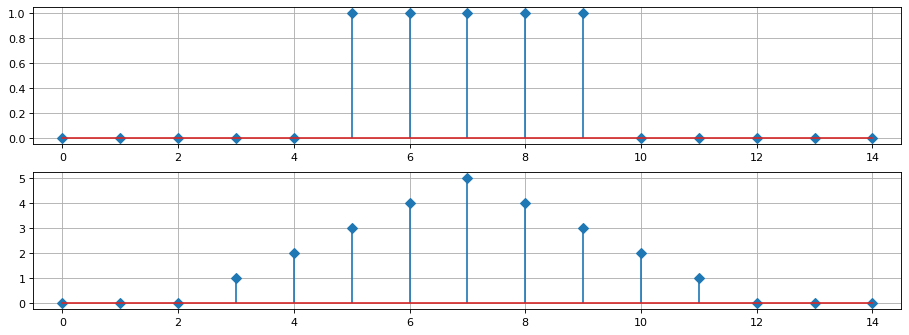

In [12]:
# Signal
x = np.concatenate([np.zeros(5), np.ones(5), np.zeros(5)])

# Convolution
cv = np.convolve(x, x, mode='same')
xl = [x, cv]

# Pot results
plt.figure(figsize=(14, 5), dpi=80)
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.stem(xl[i], linefmt='C0', markerfmt='D', use_line_collection=True)
    plt.grid(True)
    plt.xlim([-0.5, x.size-0.5])

#### Loop convolution

The cyclic (circular) convolution differs from the linear one in that the input signals have the same duration 𝑁.

Cyclic convolution of two signals $𝑎 (𝑛)$ and $𝑏 (𝑛)$, where $𝑛 = 0, ..., 𝑁 − 1$

is described by the equation:

$ s(n) = a*b = \sum_{m=0}^{N-1}a(m)\cdot b(n-m)$

where $𝑛 = 0, ..., 𝑁 − 1$
, and the number $𝑁$ is the signal length $𝑎 (𝑛)$

. As you can see, the result of the cyclic convolution has a length N.

In the following example, we calculate stepwise the convolution of signals:
`a(n) = [1, 2, 3, 4]`

`b(n) = [3, 2, 1, 0]`

Algorithm:

- Invert the second signal,
- In a cycle from 0 to N-1, we shift the second signal to the right (or the first signal to the left)
- We calculate the products of elements at each step of the cycle and calculate the sum of the products.

The result obtained does not coincide with the built-in `convolve ()` method with the parameter `mode = 'same'` due to the fact that the numpy library uses zero padding for this method.

In [13]:
# Input parameters
N = 4

# Signals
an = np.array([1, 2, 3, 4], dtype=int)
bn = np.array([3, 2, 1, 0], dtype=int)
print('a(n) = ', an)
print('b(n) = ', bn)

# Convolution with list comprehension:
ab = np.array([np.sum(an * np.roll(bn[::-1], i+1)) for i in range(N)])

# Function convolution:
print('a(n) * b(n) = ', ab)

a(n) =  [1 2 3 4]
b(n) =  [3 2 1 0]
a(n) * b(n) =  [14 12 14 20]


Step-by-step explanation of cyclic convolution

The first step is to invert the signal b (n) and start at -1 count

```
Step 1:
a = [1, 2, 3, 4]
b = [3, 0, 1, 2]

sum of prod = 1*3 + 1*3 + 2*4 = [14]

Step 2:
a = [1, 2, 3, 4]
b = [2, 3, 0, 1]

sum of prod = 1*2 + 2*3 + 1*4 = [12]

Step 3:
a = [1, 2, 3, 4]
b = [1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [1, 2, 3, 4]
b = [0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Convolution seq = [14, 12, 14, 20]
``` 

Due to the fact that the numpy library lacks a built-in function for computing cyclic convolution, the Fourier transform property can be used.
Convolution through FFT

**Fourier transform:**

The convolution of two signals in the time domain is equal to the product of their spectra in the frequency domain

$a(n) * b(n) = A(k) \cdot B(k)$  

Using this rule, it is possible to calculate the cyclic convolution of two signals.

In [14]:
# Convolution with IFFT of FFT(a) * FFT(b)
def circle_conv(an, bn):
    """
    Calculate circular convolution via FFTs. 
    Signals an & bn must have same shape.
    
    Parameters
    ----------
    an : np.array
        real 1D numpy array
    bn : np.array
        real 1D numpy array
    """
    return np.real(ifft(fft(an) * fft(bn)))


# Input parameters
N = 4

# Signals
an = np.array([1, 2, 3, 4], dtype=int)
bn = np.array([3, 2, 1, 0], dtype=int)

# Calculate circular convolution
cv = circle_conv(an, bn)

print('circular convolution = ', cv)

# Check conv method
ab_check = np.all(ab == cv)
print(ab_check)

circular convolution =  [14. 12. 14. 20.]
True


Convolution calculation through FFT has several advantages, one of which is related to the number of operations performed during the calculation.

For example, the signal $𝑎 (𝑛)$
has a length of $𝑁 = 2000$, and the signal $𝑏 (𝑛)$ has a length of $𝑀 = 8000$. The calculation of linear convolution will require $N*M = 16.000.000$ multiplication and addition operations.

However, if we supplement both sequences to $N_{FFT} = 8192$
, then to calculate the FFT, $N\cdot log_{2}(N) \approx 106.000$

complex multiplication operations (or 4 times the operations of real multiplication).

From the formula for calculating convolution via FFT, it is obvious that three FFT links are required: two direct FFTs for input signals and one inverse FFT for producting signal spectra. Complex spectral multiplications make an insignificant contribution (8192 complex multiplications), therefore, the resulting estimated value of the number of operations is $3 \cdot 4 \cdot N\cdot log_{2}(N) \approx 1.280.000$

The resulting value is **12.5** times less than if you had to calculate a linear convolution using the formula from the definition.

#### Performance comparison

Below is a table comparing the effectiveness of fast convolution and convolution, calculated by the direct formula. The table compares the number of valid multiplications required to calculate the convolution.

As you can see, for FFT lengths up to 64, fast convolution loses to the direct method. However, as the FFT length increases, the results change in the opposite direction - fast convolution begins to outperform the direct method. Moreover, the longer the FFT, the better the gain.

| **N** | **Direct Method** | **Fast convolution** | **Attitude** |
| --- | --- | --- | --- |
| 8 | 64 | 448 | 0.14 |
| 16 | 256 | 1088 | 0.24 |
| 32 | 1K | 2560 | 0.4 |
| 64 | 4K | 5888 | 0.7 |
| 128 | 16K | 13312 | 1.23 |
| ... | ... | ... | ... |
| 2K | 4M | 311296 | 13.5 |

#### The list of functions from the signal package:

Below is a list of the main functions from the scipy package on the subject of convolution and correlation.

**Convolution and correlation**

| **Function** | **Description** |
| --- | --- |
| `convolve (in1, in2 [, mode, method])` | Convolution of two N-dimensional arrays |
| `correlate (in1, in2 [, mode, method])` | Cross-correlation of two N-dimensional arrays |
| `fftconvolve (in1, in2 [, mode, axes])` | Convolution of two N-dimensional arrays through FFT |
| `convolve2d (in1, in2 [, mode, boundary, fillvalue])` | Convolution of two 2-dimensional arrays |
| `correlate2d (in1, in2 [, mode, boundary, ...])` | Correlation of two 2-dimensional arrays |
| `sepfir2d (input, hrow, hcol)` | Convolution of an array of rank 2 with the characteristic of a filter of rank 1. The function can be used to search for an image by its B-spline representation. |
| `choose_conv_method (in1, in2 [, mode, measure])` | Finding the Fastest Correlation or Convolution Method |

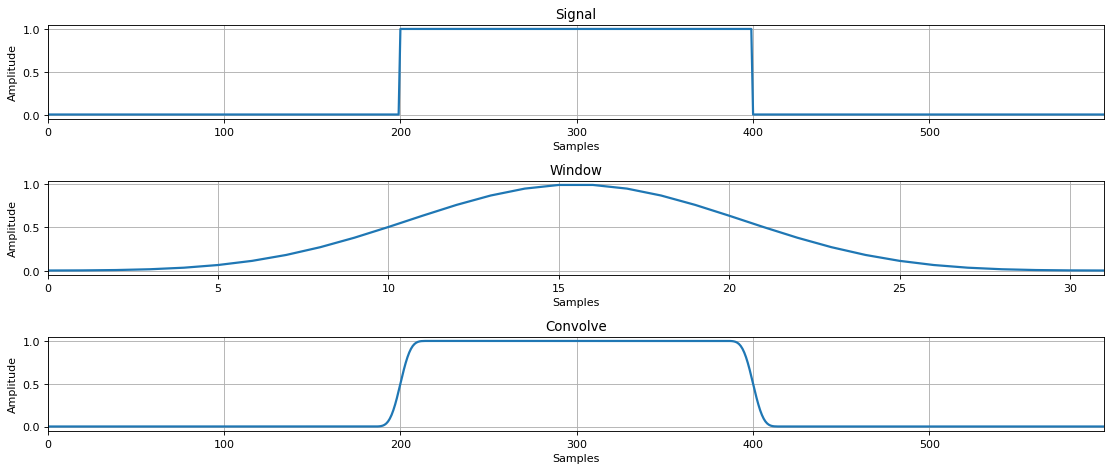

In [16]:
from scipy import signal

# Signal
sig = np.repeat([0., 1., 0.], 200) #200 0's followed by 200 1's and then 200 0's

# Window
win = signal.kaiser(32, beta=11)

# Filter by using convolve
fil = signal.convolve(sig, win, mode='same') / np.sum(win)

# list of frequencies
f_list = [sig, win, fil]
t_list = ['Signal', 'Window', 'Convolve']

# Plot
plt.figure(figsize=(14, 6), dpi=80)
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(f_list[i], '-', linewidth=2.0)
    plt.title(t_list[i])
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, f_list[i].size-1])
    plt.grid()
plt.tight_layout()